In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# word cloud

In [9]:
import os
import pandas as pd

os.chdir('/Users/ryan/Documents/GitHub/MGT4187-Project/data')
data = pd.read_csv('matched_disney_dataset.csv')

In [10]:
data = data.drop_duplicates(subset='imdb_id')
review1 = data.loc[data['imdb_id']=='tt0458290']['Review_audience'] # star wars: the clone wars
review2 = data.loc[data['imdb_id']=='tt0098536']['Review_audience'] # Turner & Hooch

review 1: star wars: the clone wars

In [11]:
review1 = eval(review1.tolist()[0])
text1 = ' '.join(review1)

In [12]:
# Step 1: tokenize sentence
words = word_tokenize(text1)

# Step 2: POS Tagging
pos_tags = nltk.pos_tag(words)

# Step 3: Map Tags
def get_wordnet_pos(treebank_tag):
    """
    description: 
    map treebank POS tags to WordNet POS tags,
    default to None
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN 

mapped_pos = [get_wordnet_pos(tag[1]) for tag in pos_tags]

# Step 4: Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word, pos) for word, pos in zip(words, mapped_pos)]

In [13]:
# Remove stop words
stop_words = set(nltk.corpus.stopwords.words('english'))
filtered_words = [word for word in lemmatized_words if word.lower() not in stop_words]

In [14]:
# Step 5: Convert the word list into string
filtered_text = ' '.join(filtered_words)

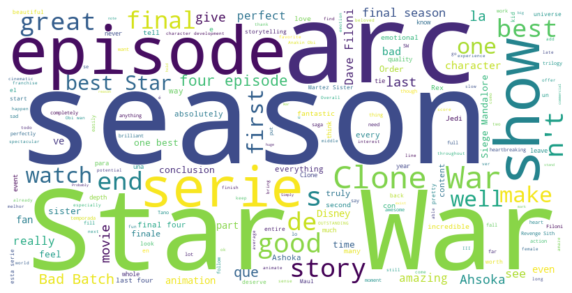

In [15]:
# show the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(filtered_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

review 2: Turner & Hooch

In [16]:
review2 = eval(review2.tolist()[0])
text2 = ' '.join(review2)

In [17]:
# Step 1: tokenize sentence
words = word_tokenize(text2)

# Step 2: POS Tagging
pos_tags = nltk.pos_tag(words)

# Step 3: Map Tags
def get_wordnet_pos(treebank_tag):
    """
    description: 
    map treebank POS tags to WordNet POS tags,
    default to None
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN 

mapped_pos = [get_wordnet_pos(tag[1]) for tag in pos_tags]

# Step 4: Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word, pos) for word, pos in zip(words, mapped_pos)]

# Remove stop words
stop_words = set(nltk.corpus.stopwords.words('english'))
filtered_words = [word for word in lemmatized_words if word.lower() not in stop_words]

# Step 5: Convert the word list into string
filtered_text = ' '.join(filtered_words)

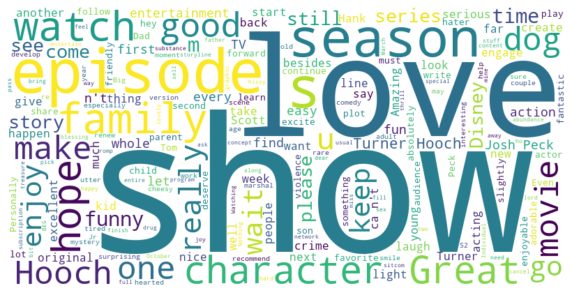

In [18]:
# show the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(filtered_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# sentiment score

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(text1)

print(vs)

{'neg': 0.136, 'neu': 0.642, 'pos': 0.222, 'compound': 1.0}


# lda topic model

In [29]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess_text(text):
    # Remove punctuation and lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

cleaned_paragraph = preprocess_text(text2)


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform([cleaned_paragraph])

In [31]:
from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics
num_topics = 5 

# Apply LDA
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=0)

In [32]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, 5) 

Topic 0:
kind friendly funnyentertainingbeautiful gal gave
Topic 1:
love season hooch episode family
Topic 2:
kind friendly funnyentertainingbeautiful gal gave
Topic 3:
kind friendly funnyentertainingbeautiful gal gave
Topic 4:
kind friendly funnyentertainingbeautiful gal gave
